In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Use matplotlib inline to display plots directly in the notebook
%matplotlib inline

In [4]:
# Load data from a CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\diksh\OneDrive\Desktop\Gov_projects\Govt_Data_Voice.csv')

In [5]:
df.shape

(104334, 10)

In [6]:
df.head()

,inout_travelling,operator,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,Indoor,RJio,4G,1,Poor Voice Quality,26.687119,82.171533,Uttar Pradesh,7,2022
1,Indoor,RJio,4G,1,Poor Voice Quality,26.687119,82.171533,Uttar Pradesh,7,2022
2,Indoor,VI,4G,1,Poor Voice Quality,-1.000000,-1.000000,NaN,7,2022
3,Indoor,VI,4G,1,Poor Voice Quality,-1.000000,-1.000000,NaN,7,2022
4,Travelling,VI,4G,4,Satisfactory,21.123036,79.067904,Maharashtra,7,2022


In [7]:
df.tail()

,inout_travelling,operator,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
104329,Indoor,RJio,4G,5,Satisfactory,12.958151,77.484752,Karnataka,11,2023
104330,Indoor,Airtel,2G,1,Poor Voice Quality,-1.000000,-1.000000,NaN,11,2023
104331,Indoor,Airtel,4G,3,Satisfactory,30.112252,78.295731,Uttarakhand,11,2023
104332,Indoor,Airtel,Unknown,3,Satisfactory,30.112252,78.295731,Uttarakhand,11,2023
104333,Indoor,Airtel,4G,1,Poor Voice Quality,-1.000000,-1.000000,NaN,11,2023


In [10]:
column_names = df.columns
print(column_names)

Index(['Location Status', 'operator', 'network_type', 'rating',
       'calldrop_category', 'latitude', 'longitude', 'state_name', 'month',
       'year'],
      dtype='object')


In [9]:
df.rename(columns={'inout_travelling': 'Location Status'}, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104334 entries, 0 to 104333
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Location Status    104334 non-null  object 
 1   operator           104334 non-null  object 
 2   network_type       104316 non-null  object 
 3   rating             104334 non-null  int64  
 4   calldrop_category  104334 non-null  object 
 5   latitude           104334 non-null  float64
 6   longitude          104334 non-null  float64
 7   state_name         58609 non-null   object 
 8   month              104334 non-null  int64  
 9   year               104334 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 8.0+ MB


In [54]:
df['network_type'] = df['network_type'].astype(str)

In [14]:
#If Latitude and Longititude is -1 or 0 or any out of india geography there state should be null .It usually happen when an android user or apple userblocked the App to accesses their location or Android Apis which google provide are unable to capture lat or Long.

In [15]:
# Indian Boundary
YOUR_MIN_LATITUDE = 6.7  # Southernmost Point
YOUR_MAX_LATITUDE = 37.6  # Northernmost Point
YOUR_MIN_LONGITUDE = 68.7  # Westernmost Point
YOUR_MAX_LONGITUDE = 97.25  # Easternmost Point

invalid_coords = df[(df['latitude'] == -1) | (df['latitude'] == 0) | 
                    (df['longitude'] == -1) | (df['longitude'] == 0) |
                    (df['latitude'] < YOUR_MIN_LATITUDE) | (df['latitude'] > YOUR_MAX_LATITUDE) |
                    (df['longitude'] < YOUR_MIN_LONGITUDE) | (df['longitude'] > YOUR_MAX_LONGITUDE)]


In [16]:
df.loc[invalid_coords.index, 'state_name'] = None


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104334 entries, 0 to 104333
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Location Status    104334 non-null  object 
 1   operator           104334 non-null  object 
 2   network_type       104316 non-null  object 
 3   rating             104334 non-null  int64  
 4   calldrop_category  104334 non-null  object 
 5   latitude           104334 non-null  float64
 6   longitude          104334 non-null  float64
 7   state_name         54384 non-null   object 
 8   month              104334 non-null  int64  
 9   year               104334 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 8.0+ MB


In [20]:
# Remove rows with any null values
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54384 entries, 0 to 104332
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location Status    54384 non-null  object 
 1   operator           54384 non-null  object 
 2   network_type       54384 non-null  object 
 3   rating             54384 non-null  int64  
 4   calldrop_category  54384 non-null  object 
 5   latitude           54384 non-null  float64
 6   longitude          54384 non-null  float64
 7   state_name         54384 non-null  object 
 8   month              54384 non-null  int64  
 9   year               54384 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 4.6+ MB


<Figure size 1200x600 with 0 Axes>

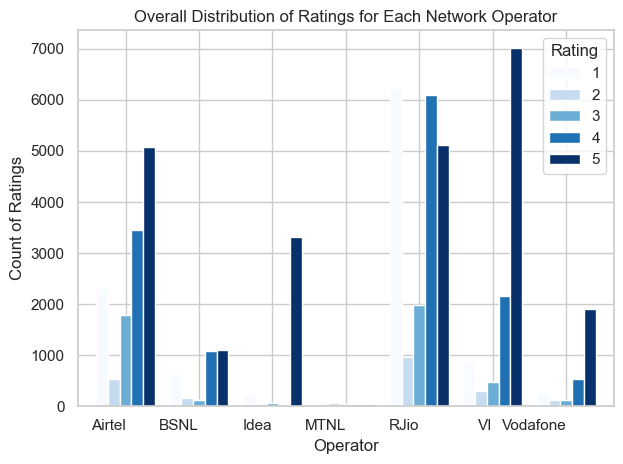

In [61]:
#1 What is the overall distribution of ratings for each network operator?

# Group data by operator and rating and count the occurrences
rating_distribution = df.groupby(['operator', 'rating']).size().unstack(fill_value=0)

# Plot the distribution for each operator
plt.figure(figsize=(12, 6))
rating_distribution.plot(kind='bar', width=0.8, colormap='Blues')
plt.title('Overall Distribution of Ratings for Each Network Operator')
plt.xlabel('Operator')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Rating', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [71]:
#2 finding the total number of ratings, the count of ratings received, and the average rating?"
# Calculate sum, count, and average rating by operators
operator_stats = df.groupby('operator')['rating'].agg(['sum', 'count', 'mean']).reset_index()

# Rename columns for better understanding
operator_stats.columns = ['Operator', 'Sum of Ratings', 'Count of Ratings', 'Average Rating']

# Display the results
print(operator_stats)

   Operator  Sum of Ratings  Count of Ratings  Average Rating
0    Airtel           47917             13152        3.643324
1      BSNL           11185              3106        3.601095
2      Idea           17136              3667        4.673030
3      MTNL             699               278        2.514388
4      RJio           64042             20392        3.140545
5        VI           46650             10852        4.298747
6  Vodafone           12529              2937        4.265918


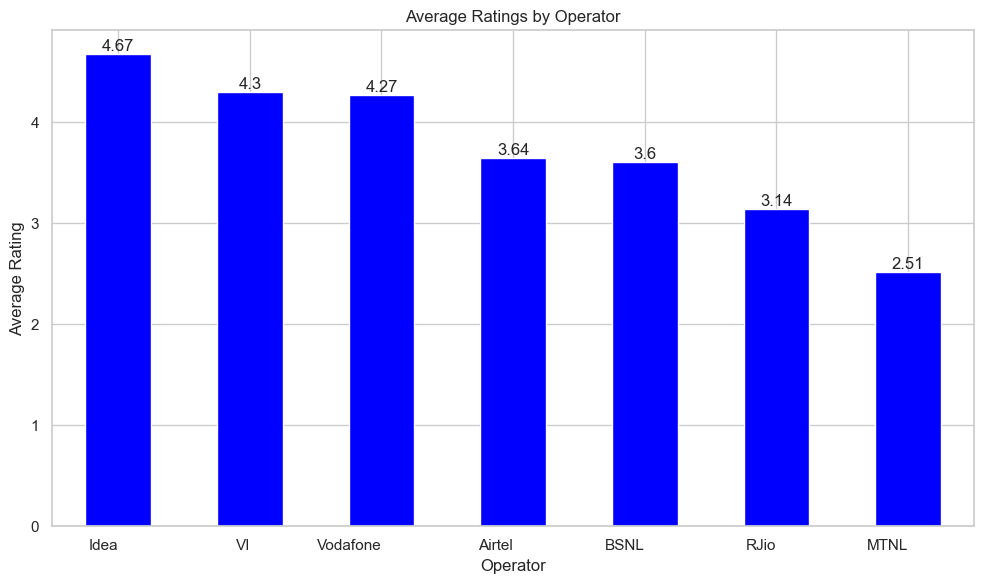

In [70]:
#3. Visualize the average ratings received by each network operator to gain insights into their performance?
# Group data by operator and calculate the average rating
average_ratings = df.groupby('operator')['rating'].mean()

# Sort the average ratings in descending order
average_ratings = average_ratings.sort_values(ascending=False)

# Plot the average ratings
plt.figure(figsize=(10, 6))
bars = average_ratings.plot(kind='bar', color='blue')
plt.title('Average Ratings by Operator')
plt.xlabel('Operator')
plt.ylabel('Average Rating')
plt.xticks(rotation=0, ha='right')

# Add value labels to the bars
for bar, value in zip(bars.patches, average_ratings.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

calldrop_category  Call Dropped  Poor Voice Quality  Satisfactory
(Airtel, 2G)               46.0               100.0         801.0
(Airtel, 3G)               29.0                26.0          78.0
(Airtel, 4G)              663.0              1418.0        6045.0
(BSNL, 2G)                 58.0                60.0         173.0
(BSNL, 3G)                143.0               189.0         346.0
(BSNL, 4G)                 42.0                98.0         937.0
(Idea, 2G)                  4.0                 2.0         158.0
(Idea, 3G)                  5.0                11.0         588.0
(Idea, 4G)                114.0               109.0        2285.0
(MTNL, 2G)                  3.0                 6.0           1.0
(MTNL, 3G)                  3.0                28.0           9.0
(MTNL, 4G)                 35.0                26.0          31.0
(RJio, 2G)                  1.0                 2.0           0.0
(RJio, 3G)                  8.0                 6.0           8.0
(RJio, 4G)

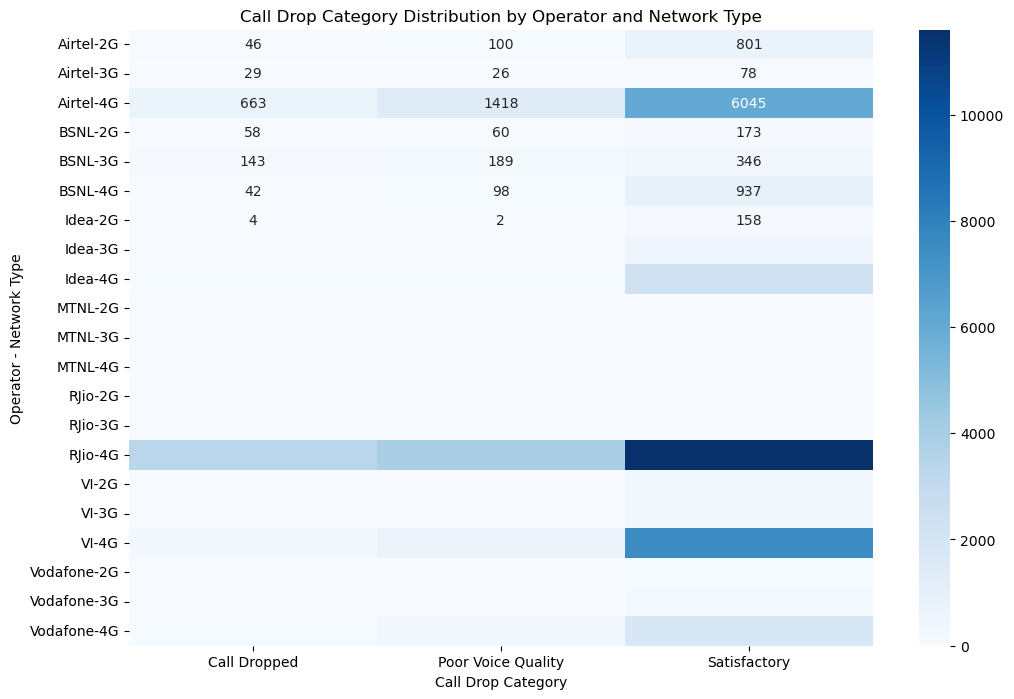

In [39]:
#4.How does the call drop category vary across different operators and network types?
# Filter out rows where network type is unknown
df_filtered = df[df['network_type'].isin(['2G', '3G', '4G'])]

# Group the filtered data by 'operator', 'network_type', and 'calldrop_category', and count the occurrences
grouped_data = df_filtered.groupby(['operator', 'network_type', 'calldrop_category']).size().reset_index(name='count')

# Pivot the grouped data to create the pivot table
pivot_table = grouped_data.pivot_table(index=['operator', 'network_type'], 
                                       columns='calldrop_category', 
                                       values='count', 
                                       fill_value=0)

# Add a row for Grand Total
pivot_table.loc['Grand Total'] = pivot_table.sum()

# Display the pivot table
print(pivot_table)

# Group the filtered data by 'operator', 'network_type', and 'calldrop_category', and count the occurrences
call_drop_counts = df_filtered.groupby(['operator', 'network_type', 'calldrop_category']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(call_drop_counts, annot=True, cmap="Blues", fmt="d")
plt.title('Call Drop Category Distribution by Operator and Network Type')
plt.xlabel('Call Drop Category')
plt.ylabel('Operator - Network Type')
plt.show()


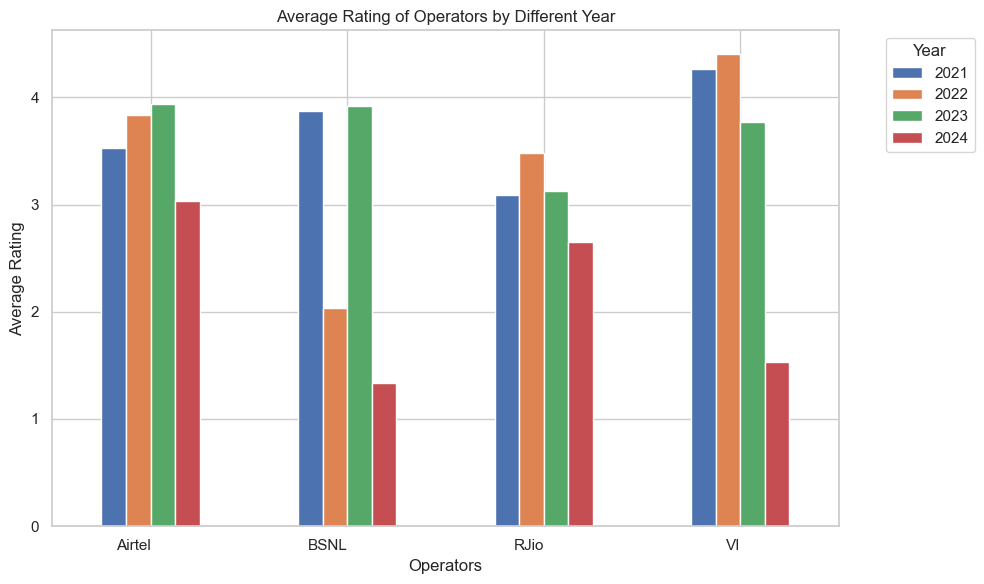

In [76]:
#5 What is the trend in network performance over time, specifically concerning the average rating of operators across different years?
# Group data by year and operator and calculate the average rating
avg_rating_by_year = df.groupby(['year', 'operator'])['rating'].mean().reset_index()

# Calculate the number of unique years for each operator
operator_year_count = avg_rating_by_year.groupby('operator')['year'].nunique()

# Filter operators where data for all years is present
avg_rating_by_year_filtered = avg_rating_by_year[avg_rating_by_year['operator'].isin(operator_year_count[operator_year_count == df['year'].nunique()].index)]

# Pivot the filtered data to have years as columns and operators as rows
pivot_avg_rating_filtered = avg_rating_by_year_filtered.pivot(index='operator', columns='year', values='rating')

# Plot the data
pivot_avg_rating_filtered.plot(kind='bar', figsize=(10, 6))
plt.title('Average Rating of Operators by Different Year')
plt.xlabel('Operators')
plt.ylabel('Average Rating')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


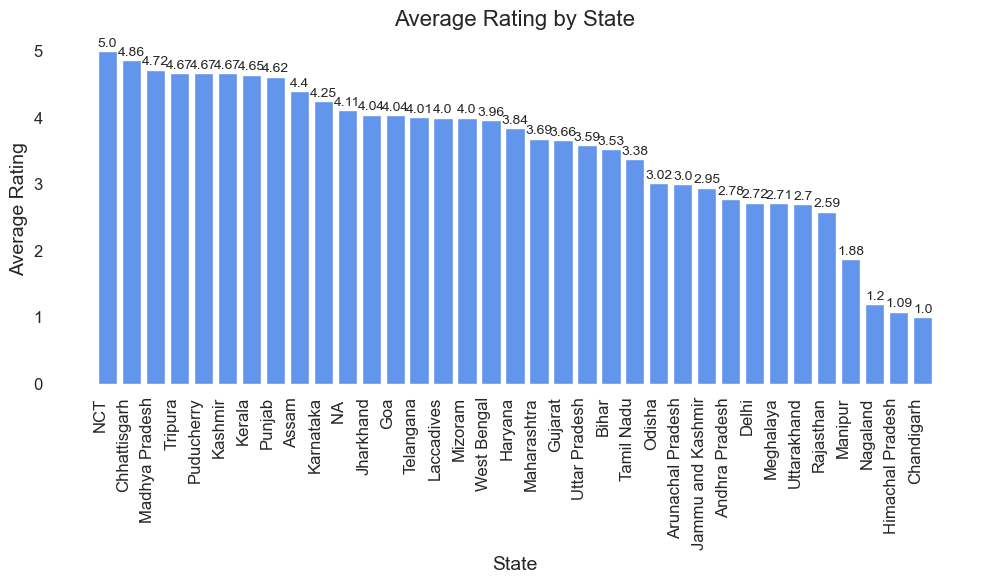

In [90]:
#6.What is the distribution of average ratings across different states, and which states tend to have the highest average ratings in terms of network performance?
# Sort the DataFrame by rating in descending order
average_rating_by_state_sorted = average_rating_by_state.sort_values(by='rating', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(average_rating_by_state_sorted['state_name'], average_rating_by_state_sorted['rating'], color='cornflowerblue')
plt.title('Average Rating by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)
plt.tight_layout()

# Add value labels to the bars
for bar, rating in zip(bars, average_rating_by_state_sorted['rating']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, round(rating, 2),
             ha='center', va='bottom', fontsize=10)

plt.show()

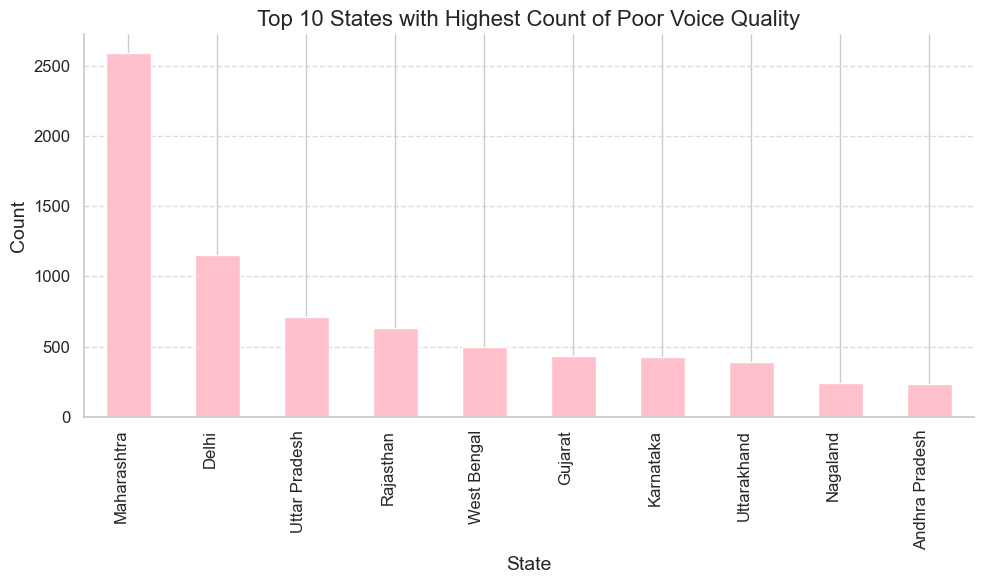

In [97]:
# 7.Which states have the highest count of poor voice quality issues reported in network calls?
# Filter the DataFrame based on calldrop_category
poor_voice_quality = df[df['calldrop_category'] == 'Poor Voice Quality']

# Get the count of Poor Voice Quality by state
poor_voice_quality_by_state = poor_voice_quality['state_name'].value_counts()

# Select the top 5 states
top_5_states = poor_voice_quality_by_state.head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_5_states.plot(kind='bar', color='pink')
plt.title('Top 10 States with Highest Count of Poor Voice Quality', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

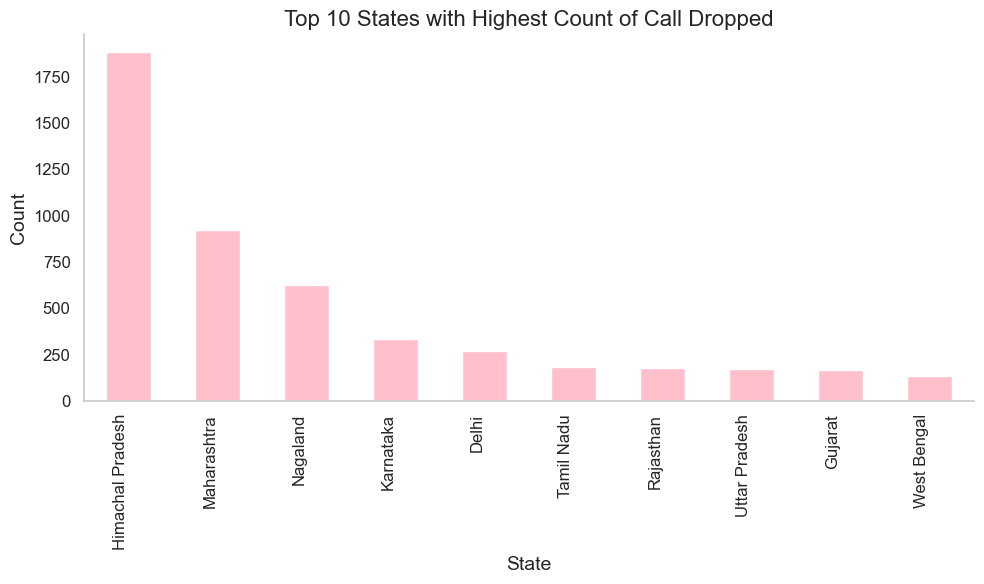

In [106]:
# 8.Which states have the highest count of call dropped issues reported in network calls?
# Filter the DataFrame based on calldrop_category
call_dropped = df[df['calldrop_category'] == 'Call Dropped']

# Get the count of Poor Voice Quality by state
call_dropped_by_state = poor_voice_quality['state_name'].value_counts()

# Select the top 5 states
top_10_states = call_dropped_by_state.head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_5_states.plot(kind='bar', color='pink')
plt.title('Top 10 States with Highest Count of Call Dropped', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
plt.tight_layout()

plt.show()

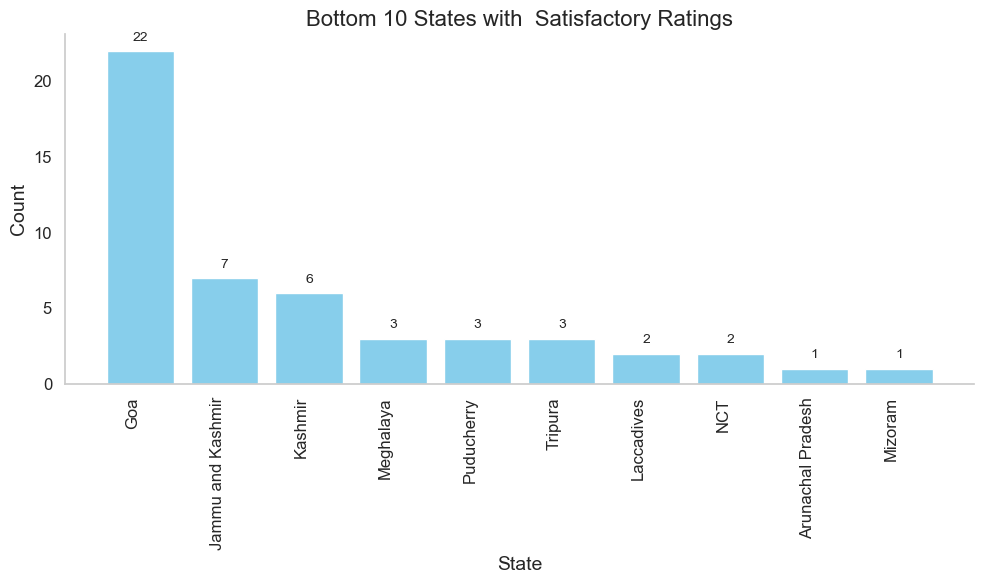

In [120]:
#9.How does the distribution of states with satisfactory ratings vary among the bottom 10 states across different years?
# Filter the DataFrame for satisfactory ratings
satisfactory_states = df[df['calldrop_category'] == 'Satisfactory']

# Count the occurrences of each state
satisfactory_state_counts = satisfactory_states['state_name'].value_counts().tail(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(satisfactory_state_counts.index, satisfactory_state_counts.values, color='skyblue')
plt.title('Bottom 10 States with  Satisfactory Ratings', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.grid(False)
plt.tight_layout()

# Add value labels to the bars
for bar, count in zip(bars, satisfactory_state_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(count),
             ha='center', va='bottom', fontsize=10)

plt.show()

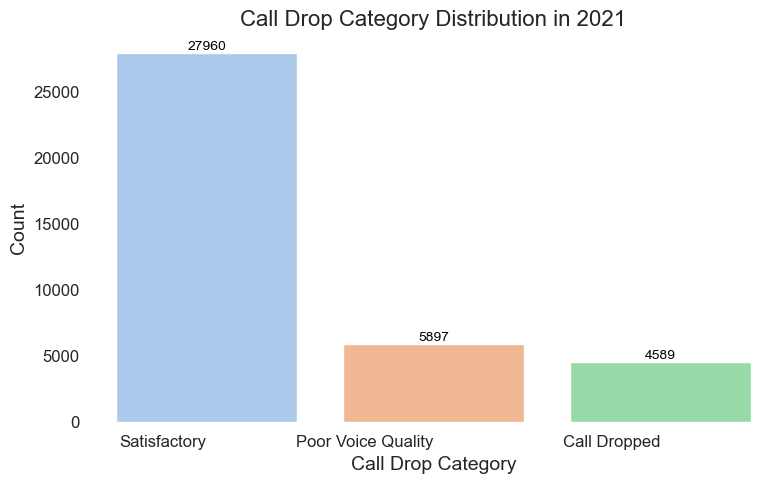

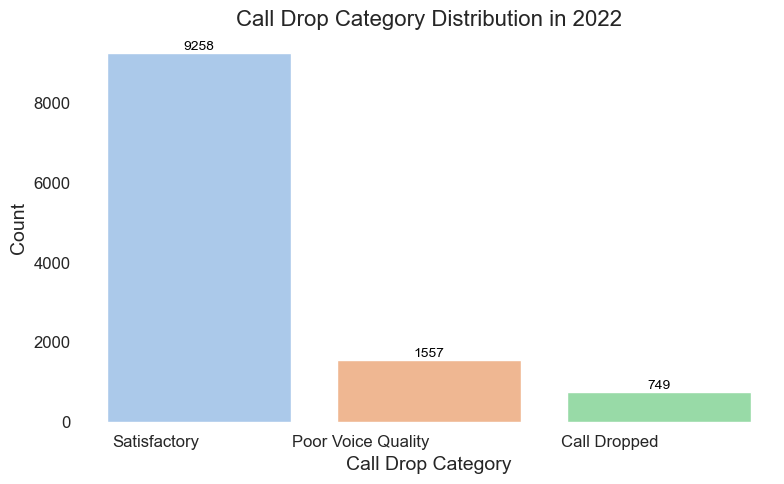

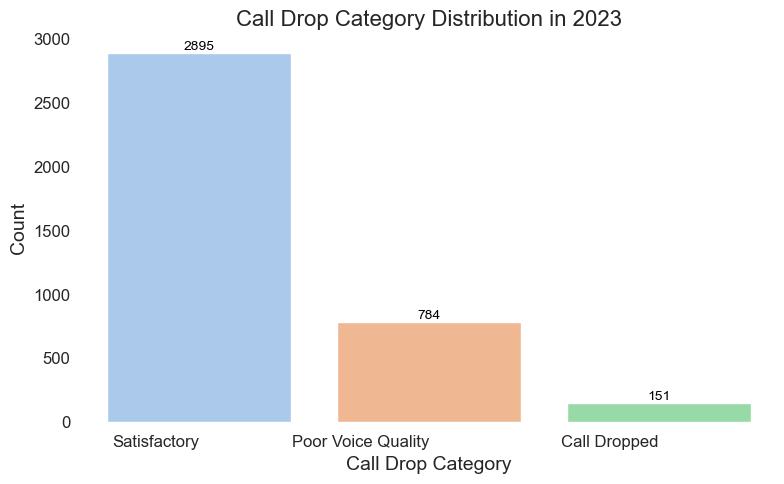

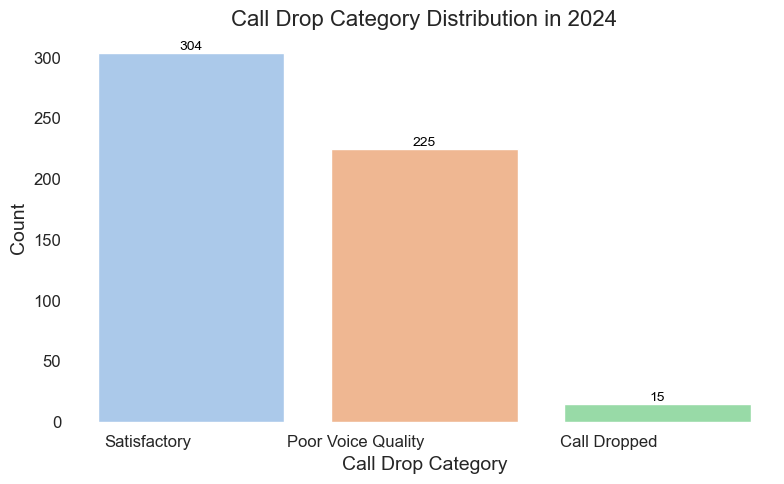

In [118]:
#10. How does the distribution of call drop categories vary over the years?
# Filter the data for each year and group by calldrop_category
calldrop_category_by_year = {}

# Get unique years in the dataset
years = sorted(df['year'].unique())  # Sort years in ascending order

# Iterate over each year
for year in years:
    # Filter the data for the current year
    data_year = df[df['year'] == year]
    
    # Group by calldrop_category and count the occurrences
    calldrop_category_count = data_year['calldrop_category'].value_counts().reset_index()
    calldrop_category_count.columns = ['calldrop_category', 'count']
    
    # Store the result for the current year
    calldrop_category_by_year[year] = calldrop_category_count

# Plotting separate bar charts for each year
for year, data in calldrop_category_by_year.items():
    plt.figure(figsize=(8, 5))
    sns.barplot(x='calldrop_category', y='count', data=data, palette='pastel')
    plt.title(f'Call Drop Category Distribution in {year}', fontsize=16)
    plt.xlabel('Call Drop Category', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=0, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.grid(False)
    plt.tight_layout()
    
    # Add labels to the bars
    for index, row in data.iterrows():
        plt.text(index, row['count'], str(row['count']), color='black', ha='center', va='bottom', fontsize=10)
    
    plt.show()

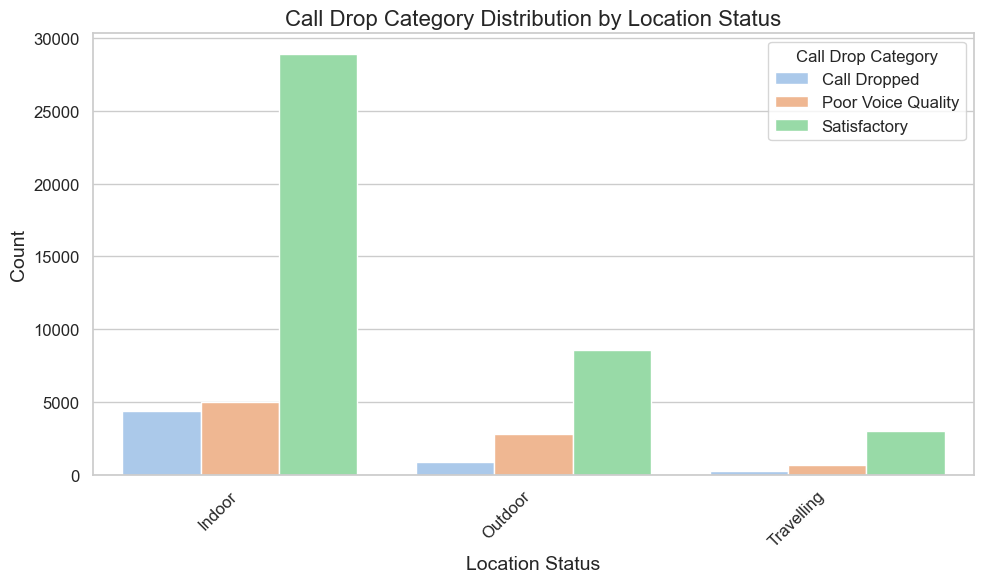

In [126]:
# Group the data by location status and calldrop category and count occurrences
location_calldrop_counts = df.groupby(['Location Status', 'calldrop_category']).size().reset_index(name='count')

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Location Status', y='count', hue='calldrop_category', data=location_calldrop_counts, palette='pastel')
plt.title('Call Drop Category Distribution by Location Status', fontsize=16)
plt.xlabel('Location Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Call Drop Category', fontsize=12)
plt.tight_layout()
plt.show()



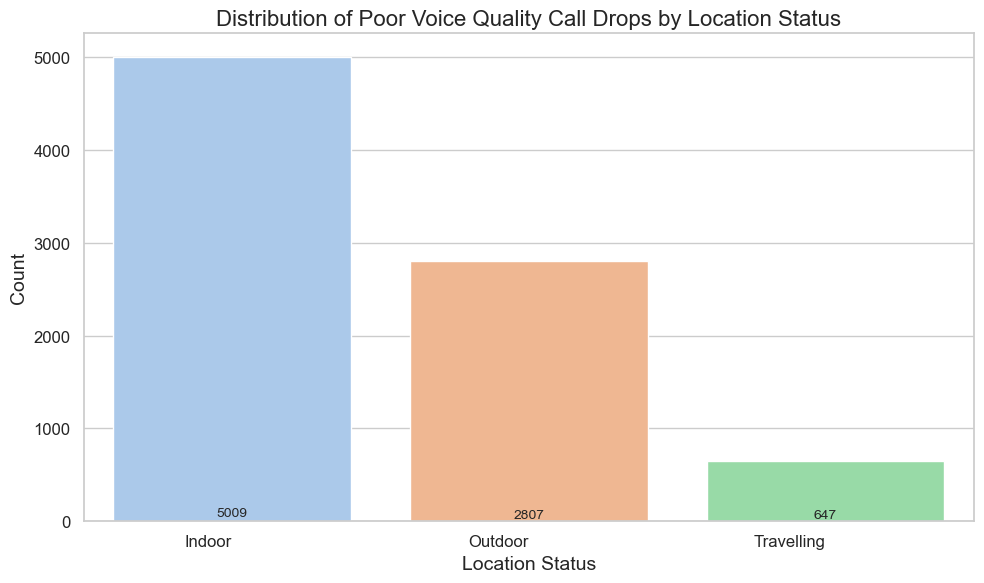

In [139]:
# Filter the data for the "Poor Voice Quality" call drop category
poor_voice_quality_data = df[df['calldrop_category'] == 'Poor Voice Quality']

# Group the data by location status and count the occurrences
location_calldrop_counts = poor_voice_quality_data['Location Status'].value_counts().reset_index()
location_calldrop_counts.columns = ['Location Status', 'count']

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Location Status', y='count', data=location_calldrop_counts, palette='pastel')
plt.title('Distribution of Poor Voice Quality Call Drops by Location Status', fontsize=16)
plt.xlabel('Location Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Add labels to the bars
for bar, count in zip(bars.patches, location_calldrop_counts['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(count),
             ha='center', va='bottom', fontsize=10)
    
plt.show()

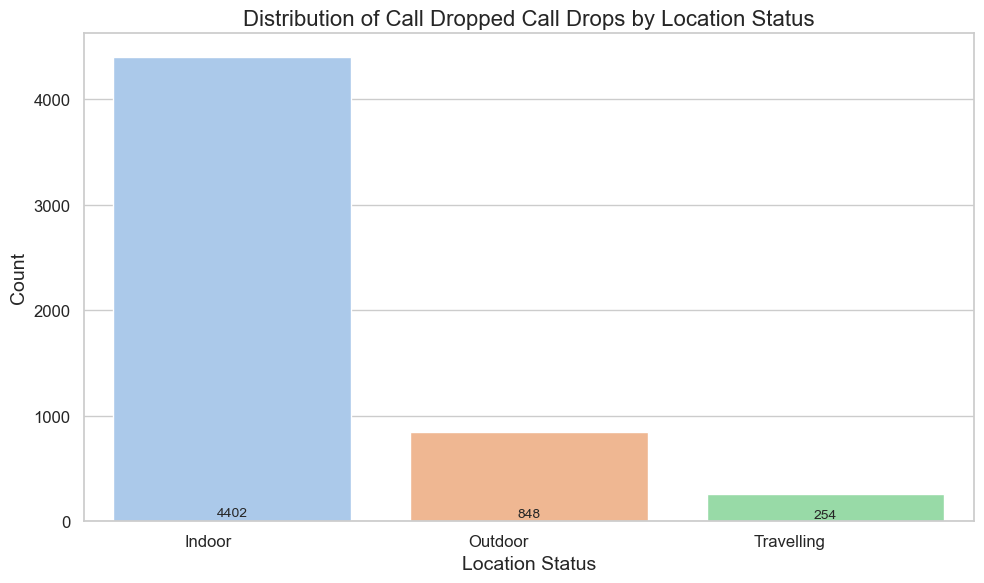

In [138]:
# Filter the data for the "Call Dropped" call drop category
call_dropped_data = df[df['calldrop_category'] == 'Call Dropped']

# Group the data by location status and count the occurrences
location_calldrop_counts = call_dropped_data['Location Status'].value_counts().reset_index()
location_calldrop_counts.columns = ['Location Status', 'count']

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Location Status', y='count', data=location_calldrop_counts, palette='pastel')
plt.title('Distribution of Call Dropped Call Drops by Location Status', fontsize=16)
plt.xlabel('Location Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
# Add labels to the bars
for bar, count in zip(bars.patches, location_calldrop_counts['count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(count),
             ha='center', va='bottom', fontsize=10)
plt.show()
